In [4]:
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(100, 2)


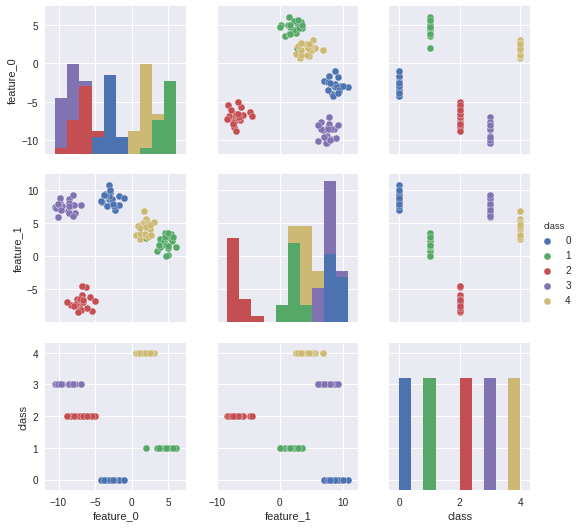

In [5]:
blobs = make_blobs(n_samples=100, n_features=2, centers=5, random_state=42)

X = blobs[0]
y= blobs[1]
print(X.shape)

feature_names = ['feature_'+str(i) for i in range(X.shape[1])]
# feature_names

blobs_df = pd.DataFrame(X, columns = feature_names)
blobs_df['class'] = y

# blobs_df.head()

# blobs_df['class'].value_counts()

sns.pairplot(blobs_df, hue='class')

In [6]:
class KMeansScratch:
    def __init__(self, k=3, epochs=10):
        self.k = k
        self.cluster_labels = list(range(self.k))
        self.epochs = epochs
        self.centroids = None
        self.clusters = None

    def starting_centroids(self, X):
        # create k starting centroids within the space defined by the values of X's features
#         np.random.seed(4)
        low, high = np.min(X), np.max(X)
        size = (self.k, X.shape[1])
        starting_centroids = np.random.uniform(low, high, size)
        
        return starting_centroids
    
    def move_centroids(self, X):
        # move the centroids after clusters have been assigned
        new_centroids = []
        
        for i in self.cluster_labels:
            tmp_X = X[self.clusters == i] #subset X to cluster i
            if tmp_X.shape[0] == 0:
                new_centroids.append(self.centroids[i])
            else:
                tmp_centroid = tmp_X.mean(axis=0)
                new_centroids.append(tmp_centroid)
            
        return np.array(new_centroids)
    
    def fit(self, X, plotting=False):
        self.centroids = self.starting_centroids(X) # get starting points
        
        for e in range(self.epochs):
            print("In epoch", e)
#             print(self.centroids)
            
            old_centroids = self.centroids.copy()
            old_clusters = self.clusters
            
            dists = cdist(X, self.centroids)
            self.clusters = dists.argmin(axis=1)
            self.centroids = self.move_centroids(X)

            if np.array_equal(old_clusters, self.clusters):
                print("finished in epoch", e)
                break

#             print(np.bincount(self.clusters))

In [7]:
kmeans = KMeansScratch(k=5, epochs=10)

In [10]:
# %%timeit
kmeans.fit(X, plotting = True)

In epoch 0
In epoch 1
In epoch 2
In epoch 3
finished in epoch 3


In [11]:
kmeans.clusters

array([4, 0, 3, 0, 3, 4, 2, 2, 1, 3, 3, 4, 0, 3, 1, 3, 0, 0, 4, 3, 3, 2, 3,
       4, 3, 3, 0, 0, 0, 2, 4, 3, 0, 0, 0, 3, 3, 3, 3, 1, 4, 1, 1, 2, 3, 3,
       3, 4, 3, 0, 0, 1, 2, 4, 1, 3, 0, 0, 3, 3, 2, 3, 3, 4, 3, 4, 0, 0, 4,
       0, 3, 4, 4, 4, 0, 3, 2, 3, 0, 4, 0, 4, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 2, 4, 3, 4, 3, 1, 2])

In [12]:
set(kmeans.clusters)

{0, 1, 2, 3, 4}

In [13]:
clustered_df = pd.DataFrame(X, columns=feature_names)
clustered_df['assigned_cluster'] = kmeans.clusters

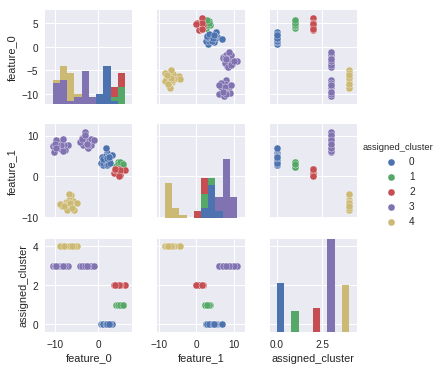

In [14]:
sns.pairplot(clustered_df, hue='assigned_cluster', size=1.75)

In [15]:
from sklearn.cluster import KMeans

In [16]:
sk_km = KMeans(n_clusters=5)

In [17]:
# %%timeit
sk_km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
sklearn_df = pd.DataFrame(X, columns=feature_names)
sklearn_df['assigned_cluster'] = sk_km.labels_

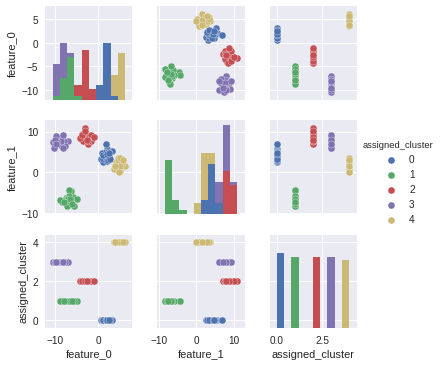

In [19]:
# fig, ax = plt.subplots(figsize=(6,6))
sns.pairplot(sklearn_df, hue='assigned_cluster', size=1.75)